# Naive Bayes classifiers on Weather dataset

Naive Bayes classification is a probabilistic approach for classification. It is based on Bayes Theorem. Naive Bayes classification uses any of the probability distributions, Gaussian distribution, Multinomial Distribution, Bernoulli distribution.


## 1. Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2. Prepare the Dataset

The dataset is based on the following.
![title](images/weather-dataset.JPG)

In [2]:
# Outlook = ['sunny' ,'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 'overcast',
#            'sunny', 'sunny', 'rainy', 'sunny', 'overcast', 'overcast', 'rainy']

# Temp = ['hot', 'hot', 'hot', 'mild', 'cool', 'cool', 'cool', 'mild', 'cool',
#        'mild','mild','mild','hot','mild']

# Humidity = ['high', 'high', 'high', 'high', 'normal', 'normal', 'normal', 'high',
#            'normal','normal','normal' , 'high', 'normal', 'high']

# Windy = ['false' ,'true' ,'false' ,'false' ,'false' ,'true' ,'true' ,'false' ,
#          'false' ,'false' ,'true' ,'true' ,'false' ,'true' ]
         
# Play = ['no','no','yes','yes','yes','no','yes','no',
#         'yes','yes','yes','yes','yes','no']}
# yoy do it this way
# weatherdata = pd.DataFrame(
#     {'Outlook': Outlook,
#      'Temp': Temp,
#      'Humidity': Humidity,
#      'Windy': Windy,
#      'Play': Play
#     })

In [3]:
# Convert the above data into Python lists. The ordering in the above data is followed.
data ={
'Outlook' :['sunny' ,'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 'overcast',
           'sunny', 'sunny', 'rainy', 'sunny', 'overcast', 'overcast', 'rainy'],

'Temp' : ['hot', 'hot', 'hot', 'mild', 'cool', 'cool', 'cool', 'mild', 'cool',
       'mild','mild','mild','hot','mild'],

'Humidity' : ['high', 'high', 'high', 'high', 'normal', 'normal', 'normal', 'high',
           'normal','normal','normal' , 'high', 'normal', 'high'],

'Windy' : ['false' ,'true' ,'false' ,'false' ,'false' ,'true' ,'true' ,'false' ,
         'false' ,'false' ,'true' ,'true' ,'false' ,'true' ],
         
'Play' : ['no','no','yes','yes','yes','no','yes','no',
        'yes','yes','yes','yes','yes','no']}


In [4]:
# create a dataframe from the above lists.

weatherdata = pd.DataFrame(data)
weatherdata.head()
# ?print(weatherdata.head())

,Outlook,Temp,Humidity,Windy,Play
0,sunny,hot,high,false,no
1,sunny,hot,high,true,no
2,overcast,hot,high,false,yes
3,rainy,mild,high,false,yes
4,rainy,cool,normal,false,yes


In [17]:
for column in weatherdata.columns:
    unique_values_counts = weatherdata[column].value_counts()
    dd=weatherdata.value_counts()
    print(f"Unique values and counts for {column}:")
    print(unique_values_counts)
#     print("DD",dd)
    print()

Unique values and counts for Outlook:
sunny       5
rainy       5
overcast    4
Name: Outlook, dtype: int64

Unique values and counts for Temp:
mild    6
hot     4
cool    4
Name: Temp, dtype: int64

Unique values and counts for Humidity:
high      7
normal    7
Name: Humidity, dtype: int64

Unique values and counts for Windy:
false    8
true     6
Name: Windy, dtype: int64

Unique values and counts for Play:
yes    9
no     5
Name: Play, dtype: int64



In [5]:
columns = ['Outlook', 'Temp', 'Humidity', 'Windy']

column_input = input("Enter the column name to filter (e.g., Outlook, Temp, Humidity, Windy): ")


if column_input in columns:
    unique_values = weatherdata[column_input].unique()
    for value in unique_values:
        filtered_data = weatherdata[weatherdata[column_input] == value]
        print(f"\nRows where {column_input} is '{value}':")
        print(filtered_data)
else:
    print("Invalid column name. Please enter one of the following column names: Outlook, Temp, Humidity, Windy")

Enter the column name to filter (e.g., Outlook, Temp, Humidity, Windy): Outlook

Rows where Outlook is 'sunny':
   Outlook  Temp Humidity  Windy Play
0    sunny   hot     high  false   no
1    sunny   hot     high   true   no
7    sunny  mild     high  false   no
8    sunny  cool   normal  false  yes
10   sunny  mild   normal   true  yes

Rows where Outlook is 'overcast':
     Outlook  Temp Humidity  Windy Play
2   overcast   hot     high  false  yes
6   overcast  cool   normal   true  yes
11  overcast  mild     high   true  yes
12  overcast   hot   normal  false  yes

Rows where Outlook is 'rainy':
   Outlook  Temp Humidity  Windy Play
3    rainy  mild     high  false  yes
4    rainy  cool   normal  false  yes
5    rainy  cool   normal   true   no
9    rainy  mild   normal  false  yes
13   rainy  mild     high   true   no


In [48]:
attributes = ['Outlook','Temp', 'Humidity', 'Windy']
for attribute in attributes:
#     print(f"{attribute}:")
    probabilities = weatherdata.groupby([attribute, 'Play']).size().unstack().fillna(0)
    probabilities['Total'] = probabilities['yes'] + probabilities['no']
    probabilities['Prob(Yes)'] = probabilities['yes'] / probabilities['yes'].sum()
    probabilities['Prob(No)'] = probabilities['no'] / probabilities['no'].sum()
    probabilities['Total Probability'] = probabilities['Prob(Yes)'] + probabilities['Prob(No)']
    probabilities = probabilities[['Prob(Yes)', 'Prob(No)', 'Total Probability']]
    print(f"\n{attribute} Probabilities:")
    print(probabilities)


Outlook Probabilities:
Play      Prob(Yes)  Prob(No)  Total Probability
Outlook                                         
overcast   0.444444       0.0           0.444444
rainy      0.333333       0.4           0.733333
sunny      0.222222       0.6           0.822222

Temp Probabilities:
Play  Prob(Yes)  Prob(No)  Total Probability
Temp                                        
cool   0.333333       0.2           0.533333
hot    0.222222       0.4           0.622222
mild   0.444444       0.4           0.844444

Humidity Probabilities:
Play      Prob(Yes)  Prob(No)  Total Probability
Humidity                                        
high       0.333333       0.8           1.133333
normal     0.666667       0.2           0.866667

Windy Probabilities:
Play   Prob(Yes)  Prob(No)  Total Probability
Windy                                        
false   0.666667       0.4           1.066667
true    0.333333       0.6           0.933333


In [55]:
# Encode the list as 0,1,2,...

from sklearn import preprocessing

le = preprocessing.LabelEncoder()

# # apply the label encoder for each list
# Outlook = le.fit_transform(Outlook)      # 2,2,0,1,1
# temp = le.fit_transform(Temp)            # 1,1,1,2,0
# humidity = le.fit_transform(Humidity)    # 0,0,0,0,1
# windy = le.fit_transform(Windy)          # 0,1,0,0,0
# play = le.fit_transform(Play)            # 0,0,1,1,1


# # create a dataframe from the encoded lists.
# weatherFeatures = pd.DataFrame(
#     {'Outlook': Outlook,
#      'temp': temp,
#      'humidity': humidity,
#      'windy': windy,
#     })
# print(weatherFeatures)

# print('Play = ', play)

# Encode each column in the DataFrame
weatherFeatures = {}
for column in weatherdata.columns:
    weatherFeatures[column] = le.fit_transform(weatherdata[column])

# Convert the encoded data back to a DataFrame
weatherFeatures = pd.DataFrame(encoded_data)

print(weatherFeatures)

    Outlook  Temp  Humidity  Windy  Play
0         2     1         0      0     0
1         2     1         0      1     0
2         0     1         0      0     1
3         1     2         0      0     1
4         1     0         1      0     1
5         1     0         1      1     0
6         0     0         1      1     1
7         2     2         0      0     0
8         2     0         1      0     1
9         1     2         1      0     1
10        2     2         1      1     1
11        0     2         0      1     1
12        0     1         1      0     1
13        1     2         0      1     0


In [65]:
Outlook = ['sunny' ,'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 'overcast',
           'sunny', 'sunny', 'rainy', 'sunny', 'overcast', 'overcast', 'rainy']

Temp = ['hot', 'hot', 'hot', 'mild', 'cool', 'cool', 'cool', 'mild', 'cool',
       'mild','mild','mild','hot','mild']

Humidity = ['high', 'high', 'high', 'high', 'normal', 'normal', 'normal', 'high',
           'normal','normal','normal' , 'high', 'normal', 'high']

Windy = ['false' ,'true' ,'false' ,'false' ,'false' ,'true' ,'true' ,'false' ,
         'false' ,'false' ,'true' ,'true' ,'false' ,'true' ]
         
Play = ['no','no','yes','yes','yes','no','yes','no',
        'yes','yes','yes','yes','yes','no']

weatherdata = pd.DataFrame(
    {'Outlook': Outlook,
     'Temp': Temp,
     'Humidity': Humidity,
     'Windy': Windy,
     'Play': Play
    })

In [66]:
le = preprocessing.LabelEncoder()

# apply the label encoder for each list
Outlook = le.fit_transform(Outlook)      # 2,2,0,1,1
temp = le.fit_transform(Temp)            # 1,1,1,2,0
humidity = le.fit_transform(Humidity)    # 0,0,0,0,1
windy = le.fit_transform(Windy)          # 0,1,0,0,0
play = le.fit_transform(Play)            # 0,0,1,1,1


# create a dataframe from the encoded lists.
weatherFeatures = pd.DataFrame(
    {'Outlook': Outlook,
     'temp': temp,
     'humidity': humidity,
     'windy': windy,
    })
print(weatherFeatures)

print('Play = ', play)

# Encode each column in the DataFrame

    Outlook  temp  humidity  windy
0         2     1         0      0
1         2     1         0      1
2         0     1         0      0
3         1     2         0      0
4         1     0         1      0
5         1     0         1      1
6         0     0         1      1
7         2     2         0      0
8         2     0         1      0
9         1     2         1      0
10        2     2         1      1
11        0     2         0      1
12        0     1         1      0
13        1     2         0      1
Play =  [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


## Visualize the dataset

In [69]:
data2d = weatherFeatures.loc[:,['Outlook','windy']]

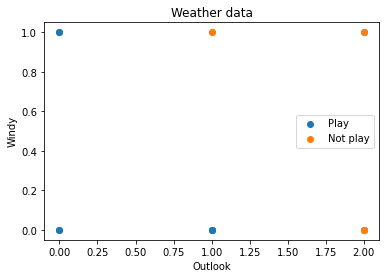

In [73]:
pos = data2d.loc[play == 1]
neg = data2d.loc[play == 0]

plt.scatter(pos.iloc[:, 0], pos.iloc[:, 1], label='Play')
plt.scatter(neg.iloc[:, 0], neg.iloc[:, 1],  label='Not play')

plt.xlabel('Outlook')
plt.ylabel('Windy')
plt.title('Weather data')
plt.legend()
plt.show()



## 3. Build the classifier  
## 4. Make predictions for new Data

In [78]:
from sklearn.naive_bayes import GaussianNB

# create an object of the GaussianNB classifier
gnb_classifier = GaussianNB()

# train the classifier
gnb_classifier.fit(weatherFeatures, play)


# predict for training data
predicted= gnb_classifier.predict(weatherFeatures)
print("Predicted Value for training data:", predicted)

# predict for new data # 0:overcast, 2:mild, 1:normal, 1:true
y= gnb_classifier.predict([[0,2,1,1]]) 
print("Predicted Value for new data:", y)


Predicted Value for training data: [0 0 1 1 1 1 1 0 1 1 1 1 1 0]
Predicted Value for new data: [1]


C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [79]:
from sklearn.naive_bayes import BernoulliNB

# create an object of the GaussianNB classifier
bnb = BernoulliNB()

# train the classifier
bnb.fit(weatherFeatures, play)


# predict for training data
predicted= bnb.predict(weatherFeatures)
print("Predicted Value for training data:", predicted)


# predict for new data # 0:overcast, 2:mild, 1:normal, 1:true
y= bnb.predict([[0,2,1,1]])
print("Predicted Value for new data:", y)


Predicted Value for training data: [0 0 1 0 1 1 1 0 1 1 1 1 1 0]
Predicted Value for new data: [1]


C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


In [80]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()

# train the classifier
mnb.fit(weatherFeatures, play)


# predict for training data
predicted= mnb.predict(weatherFeatures)
print("Predicted Value for training data:", predicted)


# predict for new data # 0:overcast, 2:mild, 1:normal, 1:true
y= mnb.predict([[0,2,1,1]]) 
print("Predicted Value for new data:", y)


Predicted Value for training data: [0 0 1 1 1 1 1 1 1 1 1 1 1 1]
Predicted Value for new data: [1]


C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


## 5. Performance Measures

In [81]:
# display the accuracy

print('GaussianNB = ', gnb_classifier.score(weatherFeatures, play)*100 )

print('BernoulliNB = ', bnb.score(weatherFeatures, play)*100 )

print('MultinomialNB = ', mnb.score(weatherFeatures, play)*100 )

GaussianNB =  92.85714285714286
BernoulliNB =  85.71428571428571
MultinomialNB =  78.57142857142857


## 6. Visualize the decision boundary

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


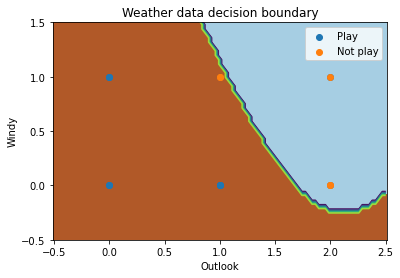

In [82]:
# Visualize  the classifier

# get min of X
x_min, x_max = data2d.iloc[:, 0].min() - .5, data2d.iloc[:, 0].max() + .5

# create a meshgrid
xx, yy  = np.meshgrid(np.linspace(x_min, x_max, num=100), np.linspace(x_min, x_max+1, num=100))

gnb = GaussianNB()
gnb.fit(data2d,play)

# predict for the meshgrid
z = gnb.predict( np.c_[xx.ravel(), yy.ravel()] )
z = z.reshape(xx.shape)

# plot the meshgrid
plt.pcolormesh(xx, yy, z, cmap=plt.cm.Paired)

# plot decision boundary
plt.contour(xx, yy, z)

# plot the dataset
plt.scatter(pos.iloc[:, 0], pos.iloc[:, 1], label='Play')
plt.scatter(neg.iloc[:, 0], neg.iloc[:, 1],  label='Not play')

plt.xlabel('Outlook')
plt.ylabel('Windy')
plt.xticks(np.arange(-0.5, 2.6, step=0.5))
plt.yticks(np.arange(-0.5, 2.6, step=0.5))
plt.ylim(-0.5,2.5)
plt.ylim(-0.5,1.5)
plt.title('Weather data decision boundary')
plt.legend()
plt.show()